In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/drive/MyDrive/woc files/linear_train.csv')

Mounted at /content/drive


[ 2.34036238e-01  2.50032231e+02 -4.31957007e-02  3.44110749e-04
 -1.38673225e-01  2.29420503e+01  6.31836705e+01 -2.65299692e-01
 -1.49202551e+02  1.56011787e+03  1.30032571e+02 -3.07216356e-01
  3.66035238e-02 -2.00951067e+00 -1.98610048e+03  2.40095359e-02
  7.64892736e+02  9.96091861e-02  6.30152786e+01  7.89092996e+02] [2.85711033e+02 2.85981291e+01 2.85963663e+01 2.15326701e-01
 2.86124823e+01 1.43828077e+01 2.85041372e+01 2.86607284e+01
 2.86681387e+02 2.85040445e+01 2.85751660e+01 2.86210535e+01
 2.86422171e+01 5.70627887e+02 2.85313943e+01 2.86937069e+01
 2.86865694e+01 2.85685563e+01 1.42544032e+02 2.84741978e+01]
40000 20


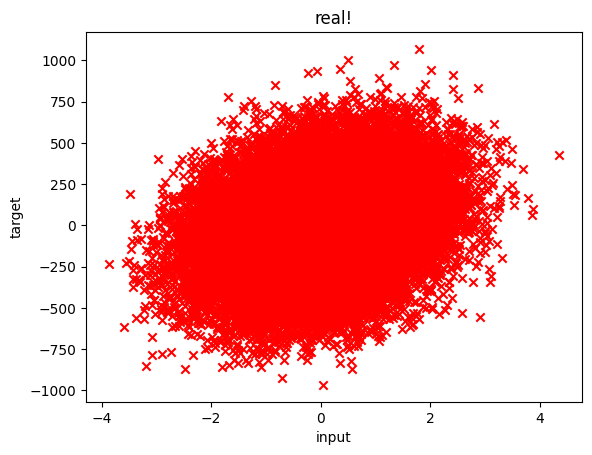

In [2]:
x_train=np.array(df.iloc[:,1:-1])
y_train=np.array(df.iloc[:,-1])

mu=np.mean(x_train,axis=0)
sigma=np.std(x_train,axis=0)
print(mu,sigma)

x_train_norm=((x_train-mu)/sigma)

x_train_train= x_train_norm[:-10000,:]
x_cv= x_train_norm[-10000:,:]
y_train_train= y_train[:-10000]
y_cv= y_train[-10000:]

Xt = x_train_train
yt = y_train_train
m,n=Xt.shape

print(m,n)

plt.scatter(Xt[:,1],yt,marker='x',c='r')
plt.title("real!")
plt.ylabel("target")
plt.xlabel("input")
plt.show()

[-3.36984835 -3.34167257 12.74796062 -1.75421399  0.56887428]


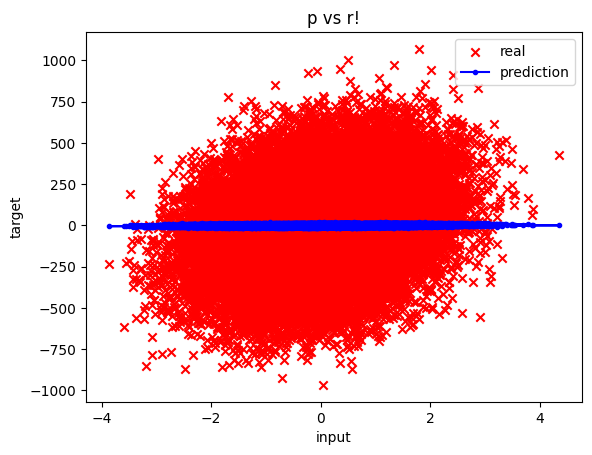

In [3]:
def function(X,w,b):#f is function/model
  f1= np.dot(X,w)+b
  return f1
rw=np.ones(n)
rb=1
print(function(Xt,rw,rb)[:5])

plt.scatter(Xt[:,1],yt,marker='x',c='r',label="real")
plt.plot(Xt[:,1],function(Xt,rw,rb),marker='.',c='b',label="prediction")
plt.title("p vs r!")
plt.ylabel("target")
plt.xlabel("input")
plt.legend()
plt.show()

def error(X,y,w,b):
  e1=function(X,w,b)-y
  return e1


def cost(X,y,w,b): #c is cost
  m,n=X.shape
  e=error(X,y,w,b)
  c1=np.sum(e**2)
  c2=c1/(2*m)
  return c2

def derivaties(X,y,w,b): #d is derivative for desent
  e = error(X,y,w,b)
  m,n=X.shape
  db=np.sum(e)/m
  dw=np.dot(X.T,e)/m

  return dw,db

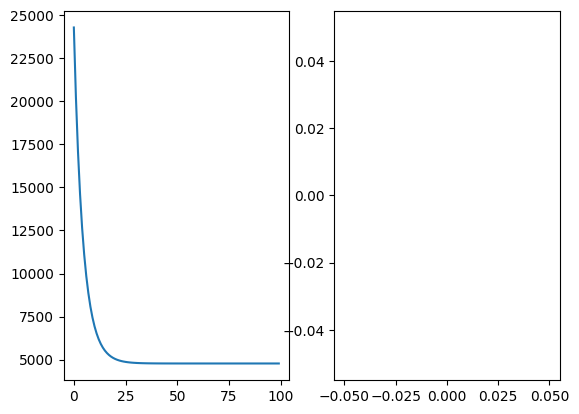

i=99,w=[73.14388488 66.26706174 97.53117877  1.87671025 17.34276902 25.14304498
 71.33857769 30.47081792 21.0573     93.52331319 39.23748518 36.93869265
  3.00406991 40.86780863 40.86780863 46.26740224 21.14087348 33.7904263
 33.54575805 38.92478596],b=-0.6282841691348716,cost=4774.74921823799


In [15]:

def gradiant(X,y,w,b,al,i): #g is gradiant
  c_log=np.zeros(i)
  for i in range(i):
    dw,db = derivaties(X,y,w,b)
    w=(w-al*dw)
    b=(b-al*db)
    c_log[i]=cost(X,y,w,b)
  fig,(ax1,ax2)=plt.subplots(1,2)
  ax1.plot(c_log[:200])
  ax2.plot(200+np.arange(len(c_log[200:])),c_log[200:])
  plt.show()
  print(f"i={i},w={w},b={b},cost={cost(X,y,w,b)}")
  return w,b
w,b= gradiant(Xt,yt,rw,rb,0.1,100)


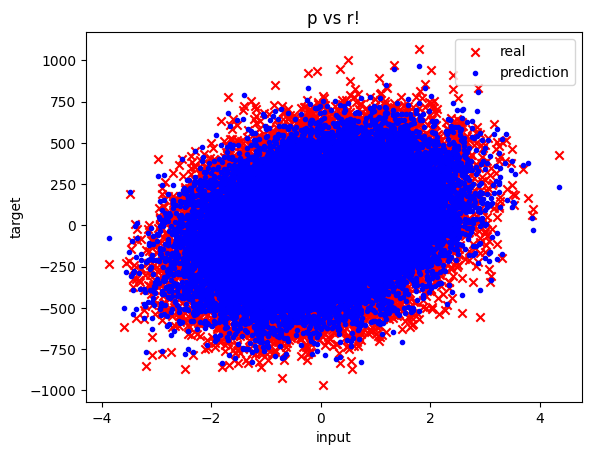

In [5]:
plt.scatter(Xt[:,1],yt,marker='x',c='r',label="real")
plt.scatter(Xt[:,1],function(Xt,w,b),marker='.',c='b',label="prediction")
plt.title("p vs r!")
plt.ylabel("target")
plt.xlabel("input")
plt.legend()
plt.show()

In [16]:
TSS=np.sum((yt-np.mean(yt))**2)
RSS=np.sum((error(Xt,yt,w,b))**2)
R_2=(1-(RSS/TSS))
print(R_2)

TSS=np.sum((y_cv-np.mean(y_cv))**2)
RSS=np.sum((error(x_cv,y_cv,w,b))**2)
R_2=(1-(RSS/TSS))
print(R_2)

0.8431150528729028
0.8417828448142812


In [7]:
dft=pd.read_csv('/content/drive/MyDrive/woc files/linear_test_data.csv')

x_test=np.array(dft.iloc[:,1:])
print(x_test)
x_test_norm=((x_test-mu)/sigma)

y_p=function(x_test_norm,w,b)


print(y_p)

dft['pridiction']=y_p

print(dft.head(5))

l=dft.columns
dftf=dft.drop(columns=l[1:-1])
print(dftf)

dftf.to_csv('final linear predictions with ids.csv')


FileNotFoundError: ignored